# create mask in California area

1. Create input file with this notebook
2. Adjust parameters (grid, K) in `window_uniform.py`
3. Run: `mpirun -n 2 python window_uniform.py`
4. Load output with this notebook


In [1]:
import xarray as xr
import numpy as np

## prepare input mask

In [2]:
# load mask file
mask = xr.open_dataset("mask_florian.nc")
mask

<xarray.Dataset>
Dimensions:  (lat: 200, lon: 200)
Coordinates:
  * lon      (lon) float64 220.0 220.1 220.2 220.3 ... 239.6 239.7 239.8 239.9
  * lat      (lat) float64 20.0 20.1 20.2 20.3 20.4 ... 39.5 39.6 39.7 39.8 39.9
Data variables:
    mask     (lat, lon) bool ...

## adjust mask

In [3]:
mask = ((~mask["mask"])
        .astype(int)
        .rename(lon="x", lat="y")
        .to_dataset()
       )

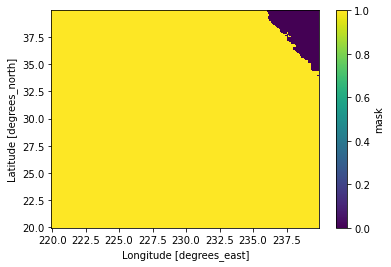

In [4]:
mask["mask"].plot()

In [5]:
mask.to_netcdf("mask.nc", mode="w")

<ipython-input-5-f4bba8964f51>:1: SerializationWarning: saving variable y with floating point data as an integer dtype without any _FillValue to use for NaNs
  mask.to_netcdf("mask.nc", mode="w")


## Compute dx, dy

In [6]:
dl = 111e3

dx = float(mask.x.diff("x").mean().values) * np.cos(np.pi/180*mask.y.mean().values)
dy = float(mask.y.diff("y").mean().values)
print("dx={:.0f}, dy={:.0f}".format(dx*dl, dy*dl))

dx=9618, dy=11100


## look at output

In [2]:
ds = xr.open_dataset("output.nc").isel(t=0, z=0)
ds

<xarray.Dataset>
Dimensions:  (x: 200, y: 200)
Coordinates:
  * x        (x) float64 0.0 1.11e+04 2.22e+04 ... 2.187e+06 2.198e+06 2.209e+06
  * y        (y) float64 0.0 9.618e+03 1.924e+04 ... 1.904e+06 1.914e+06
    z        float64 0.0
Data variables:
    window   (y, x) float64 ...

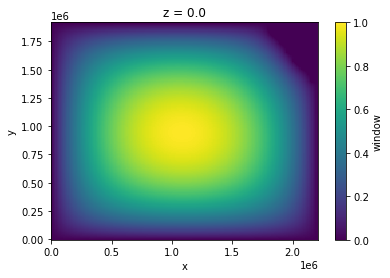

In [3]:
ds["window"].plot()

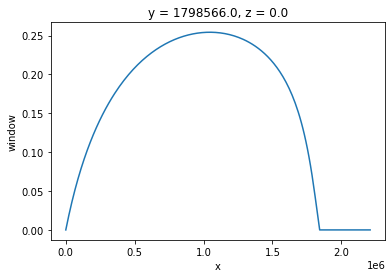

In [4]:
ds["window"].sel(y=1.8e6, method='nearest').plot()

In [5]:
ds.to_netcdf("window_california.nc", mode="w")